   index                                            premise  \
0      0  씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...   
1      1  삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...   
2      2                    이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.   
3      3  광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...   
4      4  진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...   

                                hypothesis          label  
0                           씨름의 여자들의 놀이이다.  contradiction  
1                         자작극을 벌인 이는 3명이다.  contradiction  
2  예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.     entailment  
3                        원주민들은 종합대책에 만족했다.        neutral  
4       이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.        neutral  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  

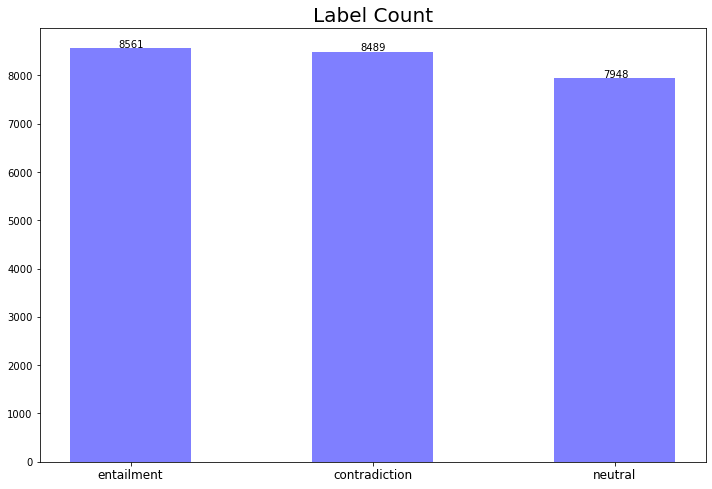

Max Premise Length:  90
Min Premise Length:  19
Mean Premise Lenght:  45.406552524201935 

Max Hypothesis Length:  103
Min Hypothesis Length:  5
Mean Hypothesis Lenght:  24.924433954716378


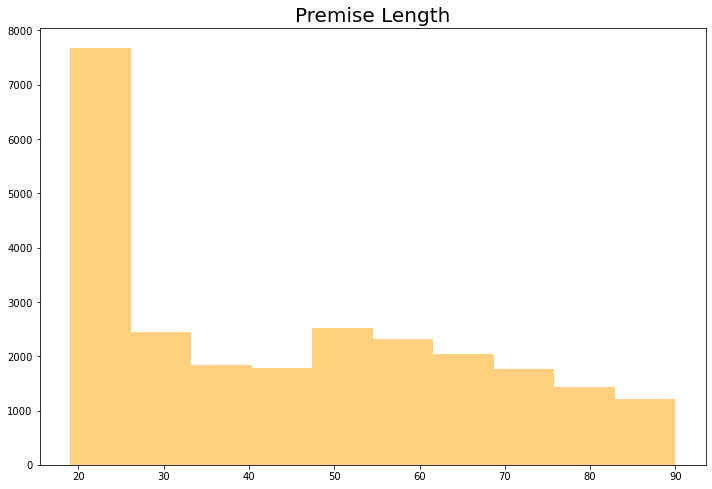

C:\Users\dkfka\AppData\Local\Temp/ipykernel_25952/1811701930.py:63: FutureWarning: The default value of regex will change from True to False in a future version.
  train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
C:\Users\dkfka\AppData\Local\Temp/ipykernel_25952/1811701930.py:64: FutureWarning: The default value of regex will change from True to False in a future version.
  test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
C:\Users\dkfka\AppData\Local\Temp/ipykernel_25952/1811701930.py:67: FutureWarning: The default value of regex will change from True to False in a future version.
  train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
C:\Users\dkfka\AppData\Local\Temp/ipykernel_25952/1811701930.py:68: FutureWarning: The default value of regex will change from True to False in a future version.
  test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")


cuda:0


Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'class

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path =  "D:/open/"

train = pd.read_csv(os.path.join(path, 'train_data.csv'), encoding='utf-8')
test = pd.read_csv(os.path.join(path, 'test_data.csv'), encoding='utf-8')

print(train.head())
print(train.info(), end='\n\n')
print(test.info())
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)
print('Train Label: ', train['label'].value_counts(), sep='\n', end='\n\n')
print('Test Label: ', test['label'].value_counts(), sep='\n')
print('Train Null: ', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test.isnull().sum(), sep='\n')

feature = train['label']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

max_len = np.max(train['premise'].str.len())
min_len = np.min(train['premise'].str.len())
mean_len = np.mean(train['premise'].str.len())

print('Max Premise Length: ', max_len)
print('Min Premise Length: ', min_len)
print('Mean Premise Lenght: ', mean_len, '\n')

max_len = np.max(train['hypothesis'].str.len())
min_len = np.min(train['hypothesis'].str.len())
mean_len = np.mean(train['hypothesis'].str.len())

print('Max Hypothesis Length: ', max_len)
print('Min Hypothesis Length: ', min_len)
print('Mean Hypothesis Lenght: ', mean_len)

from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('Premise Length', fontsize=20)

plt.hist(train['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(42)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

train_dataset, eval_dataset = train_test_split(train, test_size=0.2, shuffle=True, stratify=train['label'])

tokenized_train = tokenizer(
    list(train_dataset['premise']),
    list(train_dataset['hypothesis']),
    return_tensors="pt",
    max_length=256, # Max_Length = 190
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    list(eval_dataset['premise']),
    list(eval_dataset['hypothesis']),
    return_tensors="pt",
    max_length=256,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)
    
def label_to_num(label):
    label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2, "answer": 3}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_dataset['label'].values)
eval_label = label_to_num(eval_dataset['label'].values)

train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(19997))
print(tokenizer.decode(train_dataset.__getitem__(19997)['input_ids']))

def compute_metrics(pred):
    """ validation을 위한 metrics function """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    probs = pred.predictions

  # calculate accuracy using sklearn's function
    acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

    return {
      'accuracy': acc,
  }
    

In [2]:
training_ars = TrainingArguments(
    output_dir='./result',
    num_train_epochs=7,
    per_device_train_batch_size=32,
    save_total_limit=5,
    save_steps=500,
    evaluation_strategy='steps',
    eval_steps = 500,
    load_best_model_at_end = True,
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)



In [3]:
trainer.train()
model.save_pretrained('./result/checkpoint-4000')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

C:\ProgramData\Anaconda3\envs\torch-gpu\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 19998
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4375
 11%|█▏        | 500/4375 [07:36<46:57,  1.38it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1146, 'learning_rate': 4.428571428571428e-05, 'epoch': 0.8}


                                                  
 11%|█▏        | 500/4375 [08:11<46:57,  1.38it/s]Saving model checkpoint to ./result\checkpoint-500
Configuration saved in ./result\checkpoint-500\config.json


{'eval_loss': 1.1100436449050903, 'eval_accuracy': 0.3424, 'eval_runtime': 34.3881, 'eval_samples_per_second': 145.399, 'eval_steps_per_second': 18.175, 'epoch': 0.8}


Model weights saved in ./result\checkpoint-500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-2000] due to args.save_total_limit
 23%|██▎       | 1000/4375 [14:16<32:31,  1.73it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1081, 'learning_rate': 3.857142857142858e-05, 'epoch': 1.6}


                                                   
 23%|██▎       | 1000/4375 [14:43<32:31,  1.73it/s]Saving model checkpoint to ./result\checkpoint-1000
Configuration saved in ./result\checkpoint-1000\config.json


{'eval_loss': 1.1032185554504395, 'eval_accuracy': 0.3396, 'eval_runtime': 27.3658, 'eval_samples_per_second': 182.71, 'eval_steps_per_second': 22.839, 'epoch': 1.6}


Model weights saved in ./result\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-1000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-1000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-2500] due to args.save_total_limit
 34%|███▍      | 1500/4375 [20:11<27:58,  1.71it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1065, 'learning_rate': 3.285714285714286e-05, 'epoch': 2.4}


                                                   
 34%|███▍      | 1500/4375 [20:41<27:58,  1.71it/s]Saving model checkpoint to ./result\checkpoint-1500
Configuration saved in ./result\checkpoint-1500\config.json


{'eval_loss': 1.110990285873413, 'eval_accuracy': 0.3424, 'eval_runtime': 29.8111, 'eval_samples_per_second': 167.723, 'eval_steps_per_second': 20.965, 'epoch': 2.4}


Model weights saved in ./result\checkpoint-1500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-1500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-1500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-3000] due to args.save_total_limit
 46%|████▌     | 2000/4375 [26:04<29:35,  1.34it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1052, 'learning_rate': 2.714285714285714e-05, 'epoch': 3.2}


                                                   
 46%|████▌     | 2000/4375 [26:39<29:35,  1.34it/s]Saving model checkpoint to ./result\checkpoint-2000
Configuration saved in ./result\checkpoint-2000\config.json


{'eval_loss': 1.1009234189987183, 'eval_accuracy': 0.318, 'eval_runtime': 35.5681, 'eval_samples_per_second': 140.575, 'eval_steps_per_second': 17.572, 'epoch': 3.2}


Model weights saved in ./result\checkpoint-2000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-2000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-2000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-3500] due to args.save_total_limit
 57%|█████▋    | 2500/4375 [31:49<17:42,  1.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1028, 'learning_rate': 2.1428571428571428e-05, 'epoch': 4.0}


                                                   
 57%|█████▋    | 2500/4375 [32:16<17:42,  1.76it/s]Saving model checkpoint to ./result\checkpoint-2500
Configuration saved in ./result\checkpoint-2500\config.json


{'eval_loss': 1.0998115539550781, 'eval_accuracy': 0.3396, 'eval_runtime': 26.8936, 'eval_samples_per_second': 185.918, 'eval_steps_per_second': 23.24, 'epoch': 4.0}


Model weights saved in ./result\checkpoint-2500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-2500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-2500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-4000] due to args.save_total_limit
 69%|██████▊   | 3000/4375 [37:21<13:20,  1.72it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1028, 'learning_rate': 1.5714285714285715e-05, 'epoch': 4.8}


                                                   
 69%|██████▊   | 3000/4375 [37:49<13:20,  1.72it/s]Saving model checkpoint to ./result\checkpoint-3000
Configuration saved in ./result\checkpoint-3000\config.json


{'eval_loss': 1.1026862859725952, 'eval_accuracy': 0.318, 'eval_runtime': 27.7829, 'eval_samples_per_second': 179.967, 'eval_steps_per_second': 22.496, 'epoch': 4.8}


Model weights saved in ./result\checkpoint-3000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-3000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-3000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-500] due to args.save_total_limit
 80%|████████  | 3500/4375 [43:07<08:29,  1.72it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1016, 'learning_rate': 1e-05, 'epoch': 5.6}


                                                   
 80%|████████  | 3500/4375 [43:35<08:29,  1.72it/s]Saving model checkpoint to ./result\checkpoint-3500
Configuration saved in ./result\checkpoint-3500\config.json


{'eval_loss': 1.0995724201202393, 'eval_accuracy': 0.3424, 'eval_runtime': 28.139, 'eval_samples_per_second': 177.689, 'eval_steps_per_second': 22.211, 'epoch': 5.6}


Model weights saved in ./result\checkpoint-3500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-3500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-3500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1000] due to args.save_total_limit
 91%|█████████▏| 4000/4375 [48:59<04:37,  1.35it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0996, 'learning_rate': 4.285714285714286e-06, 'epoch': 6.4}


                                                   
 91%|█████████▏| 4000/4375 [49:34<04:37,  1.35it/s]Saving model checkpoint to ./result\checkpoint-4000
Configuration saved in ./result\checkpoint-4000\config.json


{'eval_loss': 1.0982393026351929, 'eval_accuracy': 0.3396, 'eval_runtime': 35.0974, 'eval_samples_per_second': 142.461, 'eval_steps_per_second': 17.808, 'epoch': 6.4}


Model weights saved in ./result\checkpoint-4000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-4000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-4000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1500] due to args.save_total_limit
100%|██████████| 4375/4375 [54:17<00:00,  1.41it/s]  

Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./result\checkpoint-4000 (score: 1.0982393026351929).
100%|██████████| 4375/4375 [54:19<00:00,  1.34it/s]
Configuration saved in ./result/checkpoint-4000\config.json


{'train_runtime': 3259.1322, 'train_samples_per_second': 42.952, 'train_steps_per_second': 1.342, 'train_loss': 1.104704750279018, 'epoch': 7.0}


Model weights saved in ./result/checkpoint-4000\pytorch_model.bin
loading file https://huggingface.co/klue/roberta-large/resolve/main/vocab.txt from cache at C:\Users\dkfka/.cache\huggingface\transformers\4eb906e7d0da2b04e56c7cc31ba068d7c295240a51690153c2ced71c9e4c9fc5.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer.json from cache at C:\Users\dkfka/.cache\huggingface\transformers\360b579947002f14f22331a026821b56f70679f1be1e95fe5dc5a80edc4a59e0.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-large/resolve/main/special_tokens_map.json from cache at C:\Users\dkfka/.cache\huggingface\transformers\1a24ab4628028ed80dea35ce3334a636dc656fd9a17a09bad377f88f0cbecdac.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb23
loa

In [4]:
MODEL_NAME = './result/best_model'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading configuration file ./result/best_model\config.json
Model config RobertaConfig {
  "_name_or_path": "./result/best_model",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "BertTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.16.2",
  "type_vocab

PreTrainedTokenizerFast(name_or_path='klue/roberta-large', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [6]:
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['premise']),
    list(test['hypothesis']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(1665))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

def num_to_label(label):
    label_dict = {0: "entailment", 1: "contradiction", 2: "neutral"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

answer = num_to_label(pred_answer)
print(answer)

df = pd.DataFrame(answer, columns=['index', 'label'])

df.to_csv('./result/submission08.csv', index=False)

print(df)

1666
{'input_ids': tensor([    0,   720,  3994,  2052, 10428,  2775,   647,  3657,  2119,  1085,
            3,     2,   720,  3994,  2052,   911,  2075,  3669,  2119,  3926,
         2088,  1513,  2359, 13964,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

100%|██████████| 105/105 [00:10<00:00, 10.46it/s]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

PermissionError: [Errno 13] Permission denied: './result/submission08.csv'